In [79]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [32]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [80]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import numpy as np
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc
from flask import Flask, jsonify
from datetime import datetime, timedelta

In [35]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [36]:
# reflect an existing database into a new model
database = automap_base()
# reflect the tables
database.prepare(autoload_with=engine)

In [21]:
# View all of the classes that automap found
database.classes.keys()

['measurement', 'station']

In [37]:
# Save references to each table
Measurement = database.classes.measurement
Station = database.classes.station

In [24]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Precipitation Analysis

In [81]:
# Find the most recent date in the data set.
most_recent = session.query(func.max(Measurement.date))[0]
most_recent

('2017-08-23',)

Text(0, 0.5, 'Inches')

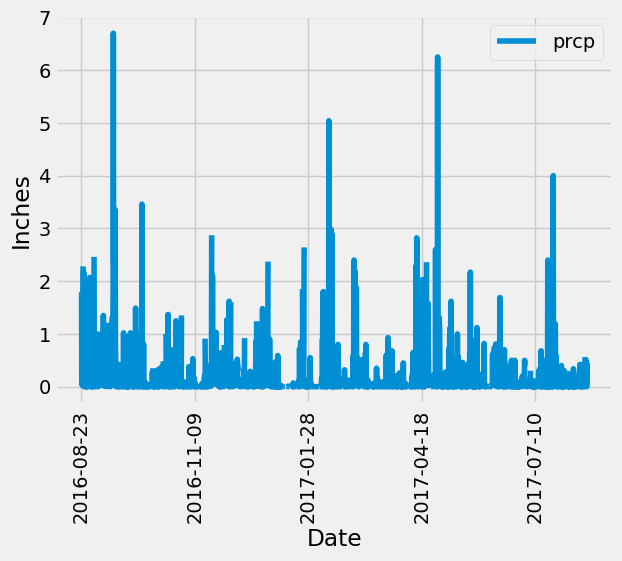

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set. 
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the date and precipitation scores
query_result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year).all()
query_result
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(data = query_result)
df
# Sort the dataframe by date
sort = df.sort_values("date")
sort
# Use Pandas Plotting with Matplotlib to plot the data
sort.plot(x = "date", y = "prcp", rot = 90)
plt.xlabel("Date")
plt.ylabel("Inches")
#plt.show()

In [46]:
# Use Pandas to calculate the summary statistics for the precipitation data
sort.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [82]:
# Design a query to calculate the total number of stations in the dataset
station_query = session.query(func.count(Station.station)).all()
station_query

[(9,)]

In [69]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [67]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()[0]
lowest_temp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).scalar()
highest_temp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).scalar()
average_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).scalar()
lowest_temp, highest_temp, average_temp

(54.0, 85.0, 71.66378066378067)

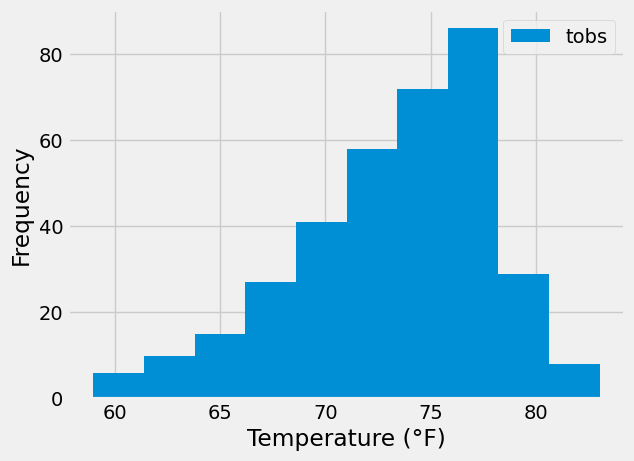

In [76]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_counts = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
temperature_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= one_year).all()
df = pd.DataFrame(temperature_data, columns=['date', 'tobs'])
plt.hist(df['tobs'])
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.show()


# Close Session

In [77]:
# Close Session
session.close()